# Dataset

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
train_dataset_path = '/home/ayagudin/dl/lobster/published/BenchmarkDatasets/BenchmarkDatasets/NoAuction/1.NoAuction_Zscore/NoAuction_Zscore_Training/'
test_dataset_path = '/home/ayagudin/dl/lobster/published/BenchmarkDatasets/BenchmarkDatasets/NoAuction/1.NoAuction_Zscore/NoAuction_Zscore_Testing/'

train_day_fmt = 'Train_Dst_NoAuction_ZScore_CF_{}.txt'
test_day_fmt = 'Test_Dst_NoAuction_ZScore_CF_{}.txt'


In [3]:
FEATURES_NUM = 144

In [4]:
def load_data(path):
    features = []
    with open(path, 'r') as f:
        for line in f.readlines():
            features.append([float(num) for num in line.split()])

    features = np.array(features)
    print(features.shape)
    return features

train_features = load_data(train_dataset_path + train_day_fmt.format(9))
test_features = load_data(test_dataset_path + test_day_fmt.format(9))

(149, 362400)
(149, 31937)


In [5]:
for i, feature in enumerate(train_features[:FEATURES_NUM]):
    mean = feature.mean()
    std = feature.std()
    assert np.isclose(mean, 0, rtol=1e-4, atol=1e-5), (i, mean)
    if not np.isclose(std, 1, rtol=1e-4):
        print(i)

129
130
131
135
136
137
141
142
143


In [6]:
def get_X_y(features):
    return features[:FEATURES_NUM].T, features[FEATURES_NUM:].T

X_train, y_train = get_X_y(train_features)
X_test, y_test = get_X_y(test_features)
print('train shape:', X_train.shape, y_train.shape)
print('test shape:', X_test.shape, y_test.shape)

train shape: (362400, 144) (362400, 5)
test shape: (31937, 144) (31937, 5)


In [7]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([1., 2., 3.]), array([504368, 816961, 490671]))
(array([1., 2., 3.]), array([43151, 77353, 39181]))


# LogisticRegression

https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tqdm.notebook import tqdm

scores = {}

for label_index in tqdm(range(5)):
    l_reg = LogisticRegression(random_state=0).fit(X_train, y_train[:, label_index])
    y_pred = l_reg.predict(X_test)
    
    score = {}
    score['accuracy'] = accuracy_score(y_test[:, label_index], y_pred)
    score['precision'] = precision_score(y_test[:, label_index], y_pred, average='macro')
    score['recall'] = recall_score(y_test[:, label_index], y_pred, average='macro')
    score['f1'] = f1_score(y_test[:, label_index], y_pred, average='macro')
    scores[label_index] = score
    

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/twix/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/twix/python/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [12]:
pd.DataFrame(scores).T

,accuracy,precision,recall,f1
0,0.669975,0.483560,0.346248,0.297576
1,0.592416,0.500078,0.399709,0.378821
2,0.530889,0.460301,0.399508,0.371654
3,0.462066,0.441917,0.424501,0.406465
4,0.443373,0.442494,0.443063,0.442766


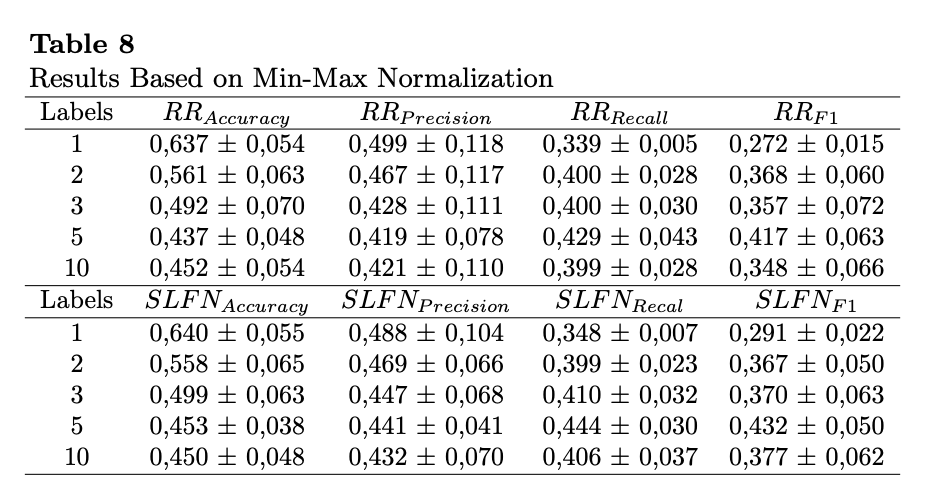

# Creating mid-price target

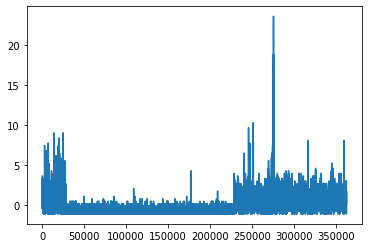

In [8]:
p_ask = X_train[:, 0]
p_bid = X_train[:, 2]
mid_price = X_train[:, 41]

plt.plot(mid_price)

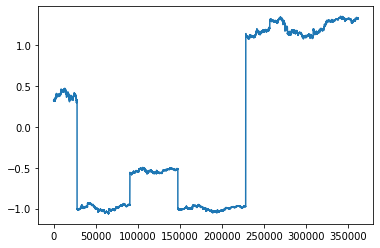

In [9]:
plt.plot(p_ask)

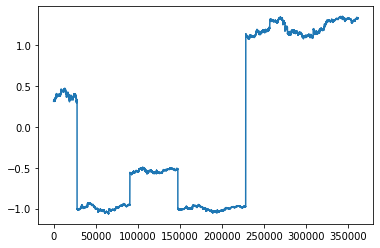

In [10]:
plt.plot(p_bid)

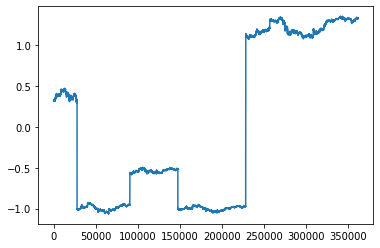

In [11]:
plt.plot((p_ask + p_bid) / 2)

In [12]:
mid_price

array([2.4216341 , 2.7378385 , 1.4730207 , ..., 0.20820284, 0.20820284,
       0.20820284])

# Gluon-ts review

In [10]:
import matplotlib.pyplot as plt
import json

from gluonts.dataset.repository.datasets import get_dataset
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
from gluonts.dataset.util import to_pandas
from gluonts.evaluation import Evaluator
from gluonts.evaluation.backtest import make_evaluation_predictions

from pts.model.deepar import DeepAREstimator
from pts.model.transformer import TransformerEstimator
from pts.model.simple_feedforward import SimpleFeedForwardEstimator

from pts.modules.distribution_output import ImplicitQuantileOutput
from pts import Trainer
from pts.dataset.repository.datasets import dataset_recipes

In [14]:
import torch

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [16]:
dataset = ListDataset(

SyntaxError: unexpected EOF while parsing (945969381.py, line 1)

In [17]:
def create_dataset(num_series, num_steps, period=24, mu=1, sigma=0.3):
    # create target: noise + pattern
    # noise
    noise = np.random.normal(mu, sigma, size=(num_series, num_steps))

    # pattern - sinusoid with different phase
    sin_minusPi_Pi = np.sin(np.tile(np.linspace(-np.pi, np.pi, period), int(num_steps / period)))
    sin_Zero_2Pi = np.sin(np.tile(np.linspace(0, 2 * np.pi, 24), int(num_steps / period)))

    pattern = np.concatenate(
        (
            np.tile(
                sin_minusPi_Pi.reshape(1, -1),
                (int(np.ceil(num_series / 2)),1)
            ),
            np.tile(
                sin_Zero_2Pi.reshape(1, -1),
                (int(np.floor(num_series / 2)), 1)
            )
        ),
        axis=0
    )

    target = noise + pattern

    # create time features: use target one period earlier, append with zeros
    feat_dynamic_real = np.concatenate(
        (
            np.zeros((num_series, period)),
            target[:, :-period]
        ),
        axis=1
    )

    # create categorical static feats: use the sinusoid type as a categorical feature
    feat_static_cat = np.concatenate(
        (
            np.zeros(int(np.ceil(num_series / 2))),
            np.ones(int(np.floor(num_series / 2)))
        ),
        axis=0
    )

    return target, feat_dynamic_real, feat_static_cat

In [18]:
# define the parameters of the dataset
custom_ds_metadata = {
    'num_series': 100,
    'num_steps': 24 * 7,
    'prediction_length': 24,
    'freq': '1H',
    'start': [
        pd.Timestamp("01-01-2019", freq='1H')
        for _ in range(100)
    ]
}

In [19]:
data_out = create_dataset(
    custom_ds_metadata['num_series'],
    custom_ds_metadata['num_steps'],
    custom_ds_metadata['prediction_length']
)

target, feat_dynamic_real, feat_static_cat = data_out

In [20]:
train_ds = ListDataset(
    [
        {
            FieldName.TARGET: target,
            FieldName.START: start,
            FieldName.FEAT_DYNAMIC_REAL: [fdr],
            FieldName.FEAT_STATIC_CAT: [fsc]
        }
        for (target, start, fdr, fsc) in zip(
            target[:, :-custom_ds_metadata['prediction_length']],
            custom_ds_metadata['start'],
            feat_dynamic_real[:, :-custom_ds_metadata['prediction_length']],
            feat_static_cat
        )
    ],
    freq=custom_ds_metadata['freq']
)

In [21]:
test_ds = ListDataset(
    [
        {
            FieldName.TARGET: target,
            FieldName.START: start,
            FieldName.FEAT_DYNAMIC_REAL: [fdr],
            FieldName.FEAT_STATIC_CAT: [fsc]
        }
        for (target, start, fdr, fsc) in zip(
            target,
            custom_ds_metadata['start'],
            feat_dynamic_real,
            feat_static_cat)
    ],
    freq=custom_ds_metadata['freq']
)

In [22]:
train_entry = next(iter(train_ds))
train_entry.keys()

dict_keys(['target', 'start', 'feat_dynamic_real', 'feat_static_cat', 'source'])

In [23]:
train_entry['target'].shape, train_entry['feat_dynamic_real'].shape

((144,), (1, 144))

In [24]:
test_entry = next(iter(test_ds))
test_entry.keys()

dict_keys(['target', 'start', 'feat_dynamic_real', 'feat_static_cat', 'source'])

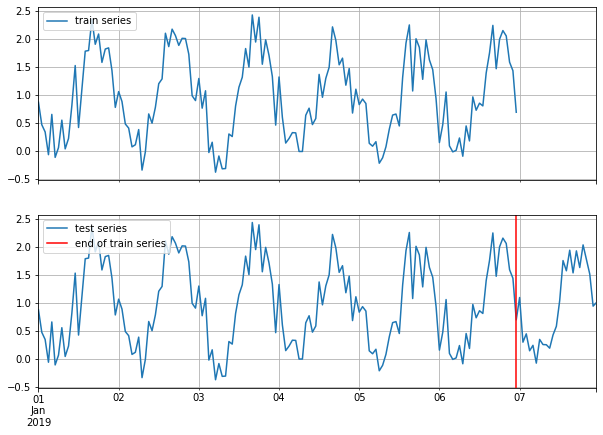

In [25]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [26]:
train_entry['target'].shape

(144,)

In [27]:
train_entry['start']

Timestamp('2019-01-01 00:00:00', freq='H')

In [28]:
train_entry['feat_dynamic_real'].shape

(1, 144)

In [29]:
train_entry['feat_static_cat'].shape

(1,)

In [30]:
train_entry

{'target': array([ 0.87263286,  0.47030038,  0.34161007, -0.06497215,  0.6548029 ,
        -0.11315759,  0.06122889,  0.5521595 ,  0.03841473,  0.22443621,
         0.8119214 ,  1.5275888 ,  0.4204767 ,  1.103273  ,  1.78461   ,
         1.7963932 ,  2.355965  ,  1.9078653 ,  2.0911126 ,  1.5841305 ,
         1.8229762 ,  1.8434241 ,  1.4388958 ,  0.78015983,  1.062182  ,
         0.8844136 ,  0.48362345,  0.4097366 ,  0.0747167 ,  0.11239291,
         0.383316  , -0.34045914, -0.01343078,  0.66290134,  0.49787366,
         0.78239375,  1.2032231 ,  1.289504  ,  2.1050384 ,  1.8663024 ,
         2.1780763 ,  2.0630429 ,  1.8881903 ,  2.0141973 ,  2.0103738 ,
         1.7292082 ,  0.9873417 ,  0.90210146,  1.2964516 ,  0.7661256 ,
         1.0769701 , -0.02652241,  0.1569944 , -0.377931  , -0.08846885,
        -0.31760314, -0.31266436,  0.30491072,  0.25871292,  0.8049683 ,
         1.140073  ,  1.3183706 ,  1.8311418 ,  1.5003474 ,  2.4320717 ,
         1.9480512 ,  2.3911705 ,  1.5511

# Pytorch-ts

In [31]:
prediction_length = 1

In [32]:
train_target = X_train[prediction_length:, 0]
train_features = X_train[:-prediction_length, :].T
test_target = X_test[prediction_length:, 0]
test_features = X_test[:-prediction_length, :].T

print(train_target.shape, train_features.shape, test_target.shape, test_features.shape)

(362399,) (144, 362399) (31936,) (144, 31936)


In [33]:
start_timestamp = pd.Timestamp("01-01-2019", freq='1H')

In [34]:
training_data = ListDataset(
       [{"start": start_timestamp, "target": train_target, "feat_dynamic_real": train_features}],
        freq = "1H"
)

test_data = ListDataset(
       [{"start": start_timestamp + start_timestamp.freq * (len(train_features) + prediction_length), 
         "target": test_target, 
         "feat_dynamic_real": test_features}],
        freq = "1H"
)

In [35]:
train_entry = next(iter(training_data))

In [36]:
train_entry['target'].shape, train_entry['feat_dynamic_real'].shape

((362399,), (144, 362399))

In [37]:
estimator = SimpleFeedForwardEstimator(freq="1H",
                            prediction_length=prediction_length,
                            mean_scaling=False,
                            trainer=Trainer(epochs=1,
                                            device=device))

In [38]:
predictor = estimator.train(training_data=training_data)

  0%|          | 0/49 [00:00<?, ?it/s]

In [39]:
predictions = predictor.predict(training_data)

In [40]:
preds = next(predictions)

In [137]:
for test_entry, forecast in zip(test_data,

SyntaxError: unexpected EOF while parsing (1831103074.py, line 1)

In [41]:
preds.samples.shape

(100, 1)

In [51]:
preds

gluonts.model.forecast.SampleForecast(freq="1H", info=None, item_id=None, samples=numpy.array([[1.6477149724960327], [1.1014130115509033], [0.7594659924507141], [0.7325944900512695], [1.563553810119629], [1.0649256706237793], [1.7525784969329834], [0.9012746810913086], [1.039421558380127], [1.6515755653381348], [1.6832971572875977], [1.411629557609558], [2.8381547927856445], [1.190524935722351], [1.0956642627716064], [1.2756856679916382], [1.61222243309021], [2.673056125640869], [0.4323335886001587], [2.1190907955169678], [0.4909477233886719], [1.2052081823349], [0.7637818455696106], [1.7361149787902832], [1.4546397924423218], [0.8113080263137817], [1.2607166767120361], [1.7954713106155396], [1.0889238119125366], [1.6356981992721558], [0.9833033084869385], [2.403329372406006], [0.48340463638305664], [1.3254224061965942], [0.6809029579162598], [1.0640555620193481], [0.8080394268035889], [1.242757797241211], [1.813731074333191], [1.6284325122833252], [2.1781928539276123], [1.131161212921

In [52]:
dir(preds)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs_ex__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_args__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_dim',
 '_index',
 '_mean',
 '_sorted_samples',
 '_sorted_samples_value',
 'as_json_dict',
 'copy_aggregate',
 'copy_dim',
 'dim',
 'freq',
 'index',
 'info',
 'item_id',
 'mean',
 'mean_ts',
 'median',
 'num_samples',
 'plot',
 'prediction_length',
 'quantile',
 'quantile_ts',
 'samples',
 'start_date',
 'to_quantile_forecast']

In [53]:
preds.start_date

Timestamp('2060-05-04 23:00:00', freq='H')

In [54]:
preds.start_date

Timestamp('2060-05-04 23:00:00', freq='H')

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

from pts.model.deepar import DeepAREstimator
from pts.model.simple_feedforward import SimpleFeedForwardEstimator
from pts import Trainer

url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)


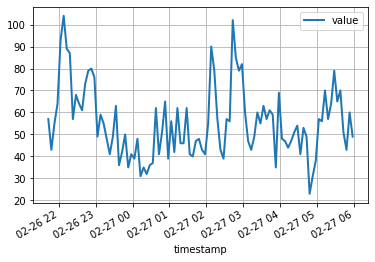

In [11]:
df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()


In [12]:
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"],
     "feat_dynamic_real": np.zeros(shape= (5, len(df.value[:"2015-04-05 00:00:00"])))
     }],
    freq = "5min"
)

In [13]:
import numpy as np
np.zeros(shape= (5, len(df.value[:"2015-04-05 00:00:00"])))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

estimator = SimpleFeedForwardEstimator(freq="5min",
                                       prediction_length=12,
                            trainer=Trainer(epochs=1,
                                            device=device))
predictor = estimator.train(training_data=training_data)


  0%|          | 0/49 [00:00<?, ?it/s]

In [15]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

In [31]:
df.value[:"2015-04-15 00:00:00"]

timestamp
2015-02-26 21:42:53    57
2015-02-26 21:47:53    43
2015-02-26 21:52:53    55
2015-02-26 21:57:53    64
2015-02-26 22:02:53    93
                       ..
2015-04-14 23:37:53    53
2015-04-14 23:42:53    75
2015-04-14 23:47:53    43
2015-04-14 23:52:53    46
2015-04-14 23:57:53    52
Name: value, Length: 13564, dtype: int64

(100, 12)


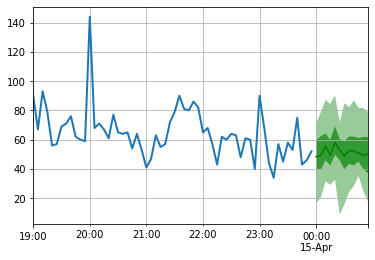

In [20]:
for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
    print(forecast.samples.shape)
plt.grid(which='both')

In [24]:
preds = next(iter(predictor.predict(test_data)))

In [32]:
from gluonts.evaluation.backtest import make_evaluation_predictions


In [48]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,
    predictor=predictor,
    num_samples=100
)

In [49]:
preds = next(forecast_it)

In [51]:
preds.samples.shape

(100, 12)

In [42]:
from tqdm.notebook import tqdm

print("Obtaining time series conditioning values ...")
tss = list(tqdm(ts_it, total=len(test_data)))
print("Obtaining time series predictions ...")
forecasts = list(tqdm(forecast_it, total=len(test_data)))

Obtaining time series conditioning values ...


  0%|          | 0/1 [00:00<?, ?it/s]

Obtaining time series predictions ...


  0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
len(forecasts)

0

In [1]:
import pprint

from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.mx.trainer import Trainer


print(f"datasets available: {dataset_recipes.keys()}")

# we pick m4_hourly as it only contains a few hundred time series
dataset = get_dataset("m4_hourly", regenerate=False)

estimator = SimpleFeedForwardEstimator(
    prediction_length=dataset.metadata.prediction_length,
    freq=dataset.metadata.freq,
    trainer=Trainer(epochs=5, num_batches_per_epoch=10),
)

predictor = estimator.train(dataset.train)

forecast_it, ts_it = make_evaluation_predictions(
    dataset.test, predictor=predictor, num_samples=100
)

agg_metrics, item_metrics = Evaluator()(
    ts_it, forecast_it, num_series=len(dataset.test)
)

pprint.pprint(agg_metrics)

datasets available: odict_keys(['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5'])


Running evaluation: 100%|██████████████████████████████████████████████████████████| 414/414 [00:00<00:00, 472.89it/s]


{'Coverage[0.1]': 0.07503019323671499,
 'Coverage[0.2]': 0.12172906602254431,
 'Coverage[0.3]': 0.1701388888888889,
 'Coverage[0.4]': 0.2427536231884058,
 'Coverage[0.5]': 0.3252818035426731,
 'Coverage[0.6]': 0.42044082125603865,
 'Coverage[0.7]': 0.5565116747181964,
 'Coverage[0.8]': 0.710245571658615,
 'Coverage[0.9]': 0.8713768115942029,
 'MAE_Coverage': 0.11183239398819111,
 'MAPE': 0.37201615812889804,
 'MASE': 7.3499454434595375,
 'MSE': 19548023.223297343,
 'MSIS': 84.08871077713034,
 'ND': 0.09310707705453726,
 'NRMSE': 0.603607107992695,
 'OWA': nan,
 'QuantileLoss[0.1]': 9461371.362832546,
 'QuantileLoss[0.2]': 12644701.828152085,
 'QuantileLoss[0.3]': 13771084.400046349,
 'QuantileLoss[0.4]': 13832994.16189499,
 'QuantileLoss[0.5]': 13552560.296293259,
 'QuantileLoss[0.6]': 12699646.901609423,
 'QuantileLoss[0.7]': 11266518.336585237,
 'QuantileLoss[0.8]': 9349590.493006133,
 'QuantileLoss[0.9]': 7281499.239299772,
 'RMSE': 4421.314648755203,
 'abs_error': 13552560.32913971

In [3]:
len(dataset.test)

414

# Custom DL training 
### TODO
* define training datasets and loaders
* copy paste training loop from TransLOB or generative models